In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import feature_extraction, naive_bayes, metrics
from sklearn.tree import DecisionTreeClassifier
import math
import seaborn as sns
%matplotlib inline
import sys




## Import Training Set

In [4]:
dfTraining = pd.read_csv('trainingset.txt')

print(dfTraining)

       age      job   marital  education default  balance housing loan  \
0       44  JobCat9    single  secondary      no       29     yes   no   
1       47  JobCat3   married    unknown      no     1506     yes   no   
2       31  unknown    single    unknown      no        1      no   no   
3       26  JobCat6    single   tertiary      no      447     yes  yes   
4       42  JobCat4  divorced   tertiary     yes        2     yes   no   
...    ...      ...       ...        ...     ...      ...     ...  ...   
27267   73  JobCat2   married  secondary      no     2850      no   no   
27268   23  JobCat9    single  secondary      no      505      no  yes   
27269   72  JobCat2   married  secondary      no     5715      no   no   
27270   57  JobCat3   married  secondary      no      668      no   no   
27271   35  JobCat4   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome  \
0        unknown    5   may       

## Import Query set

In [5]:

dfTest = pd.read_csv('queries.txt')

dfTest.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,JobCat6,married,tertiary,no,2143,yes,no,unknown,5,may,0,1,-1,0,unknown,?
1,31,JobCat4,married,secondary,no,2,yes,yes,unknown,5,may,0,1,-1,0,unknown,?
2,33,JobCat6,married,tertiary,no,231,yes,no,unknown,5,may,0,1,-1,0,unknown,?
3,43,JobCat9,single,secondary,no,593,yes,no,unknown,5,may,0,1,-1,0,unknown,?
4,27,JobCat11,single,secondary,no,390,yes,no,unknown,5,may,0,1,-1,0,unknown,?


Get columns name 

In [6]:
columns_name = dfTraining.columns.tolist()
columns_name


['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y']

Get columns types


In [7]:
dfTraining.dtypes   

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

### Data visualisation

In [8]:
def GeneratePairGrid(df):
    PairGrid = sns.PairGrid(df, diag_sharey=False)
    PairGrid.map_upper(sns.histplot)
    PairGrid.map_lower(sns.histplot)
    PairGrid.map_diag(sns.kdeplot)
    plt.show()
    

c:\Users\d4nie\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=vector, **plot_kwargs)


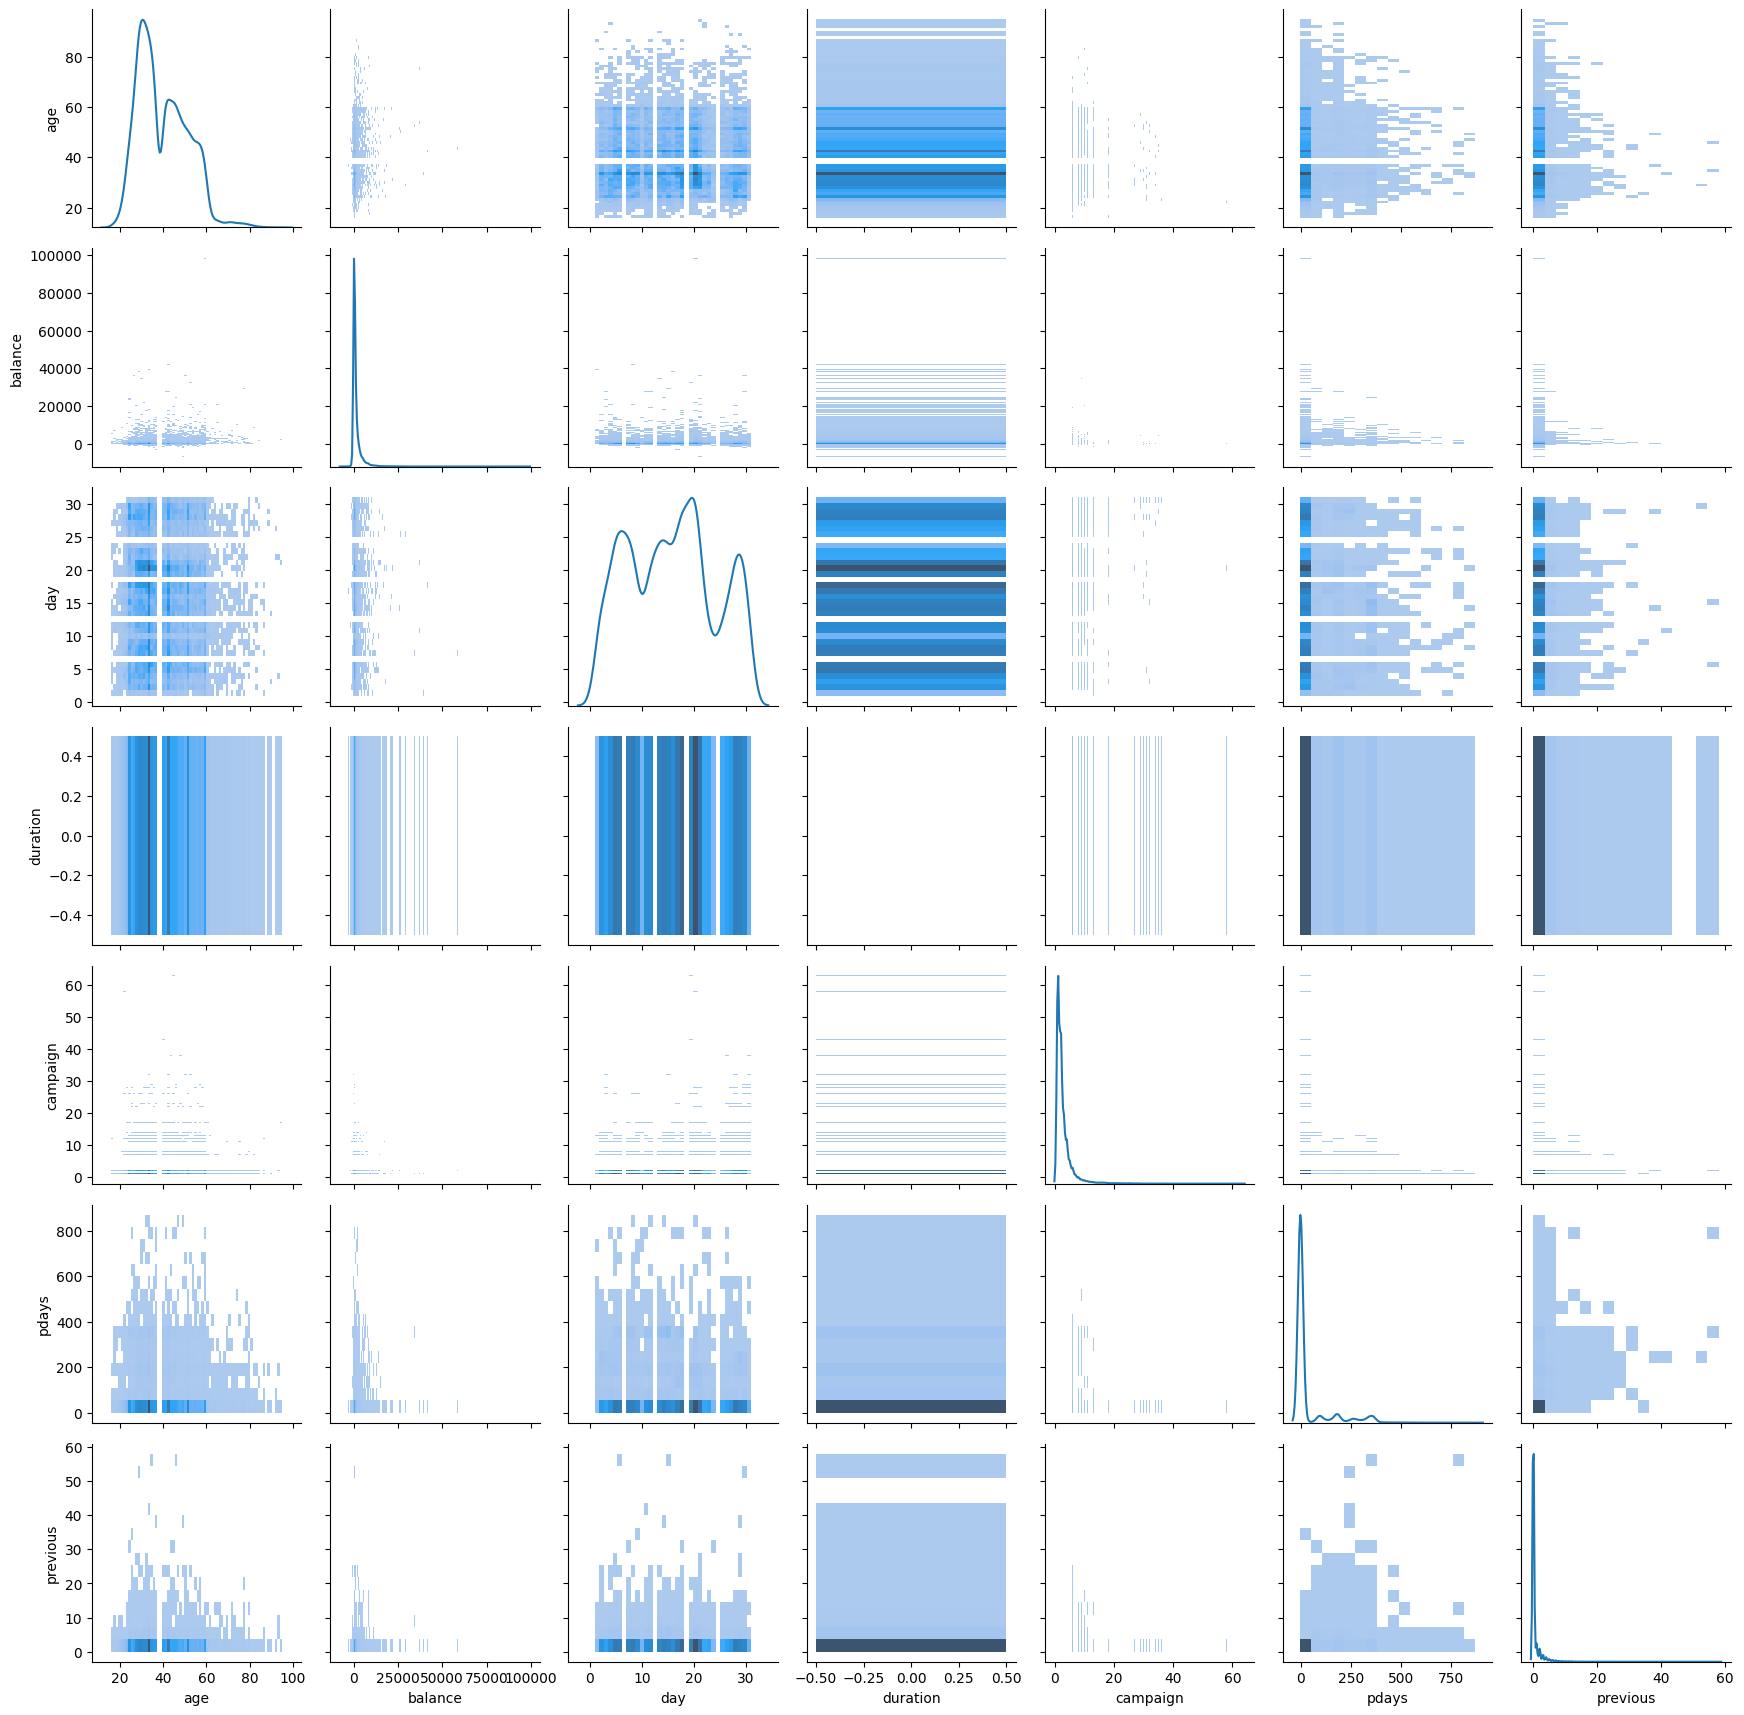

In [9]:
GeneratePairGrid(dfTraining)


c:\Users\d4nie\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=vector, **plot_kwargs)


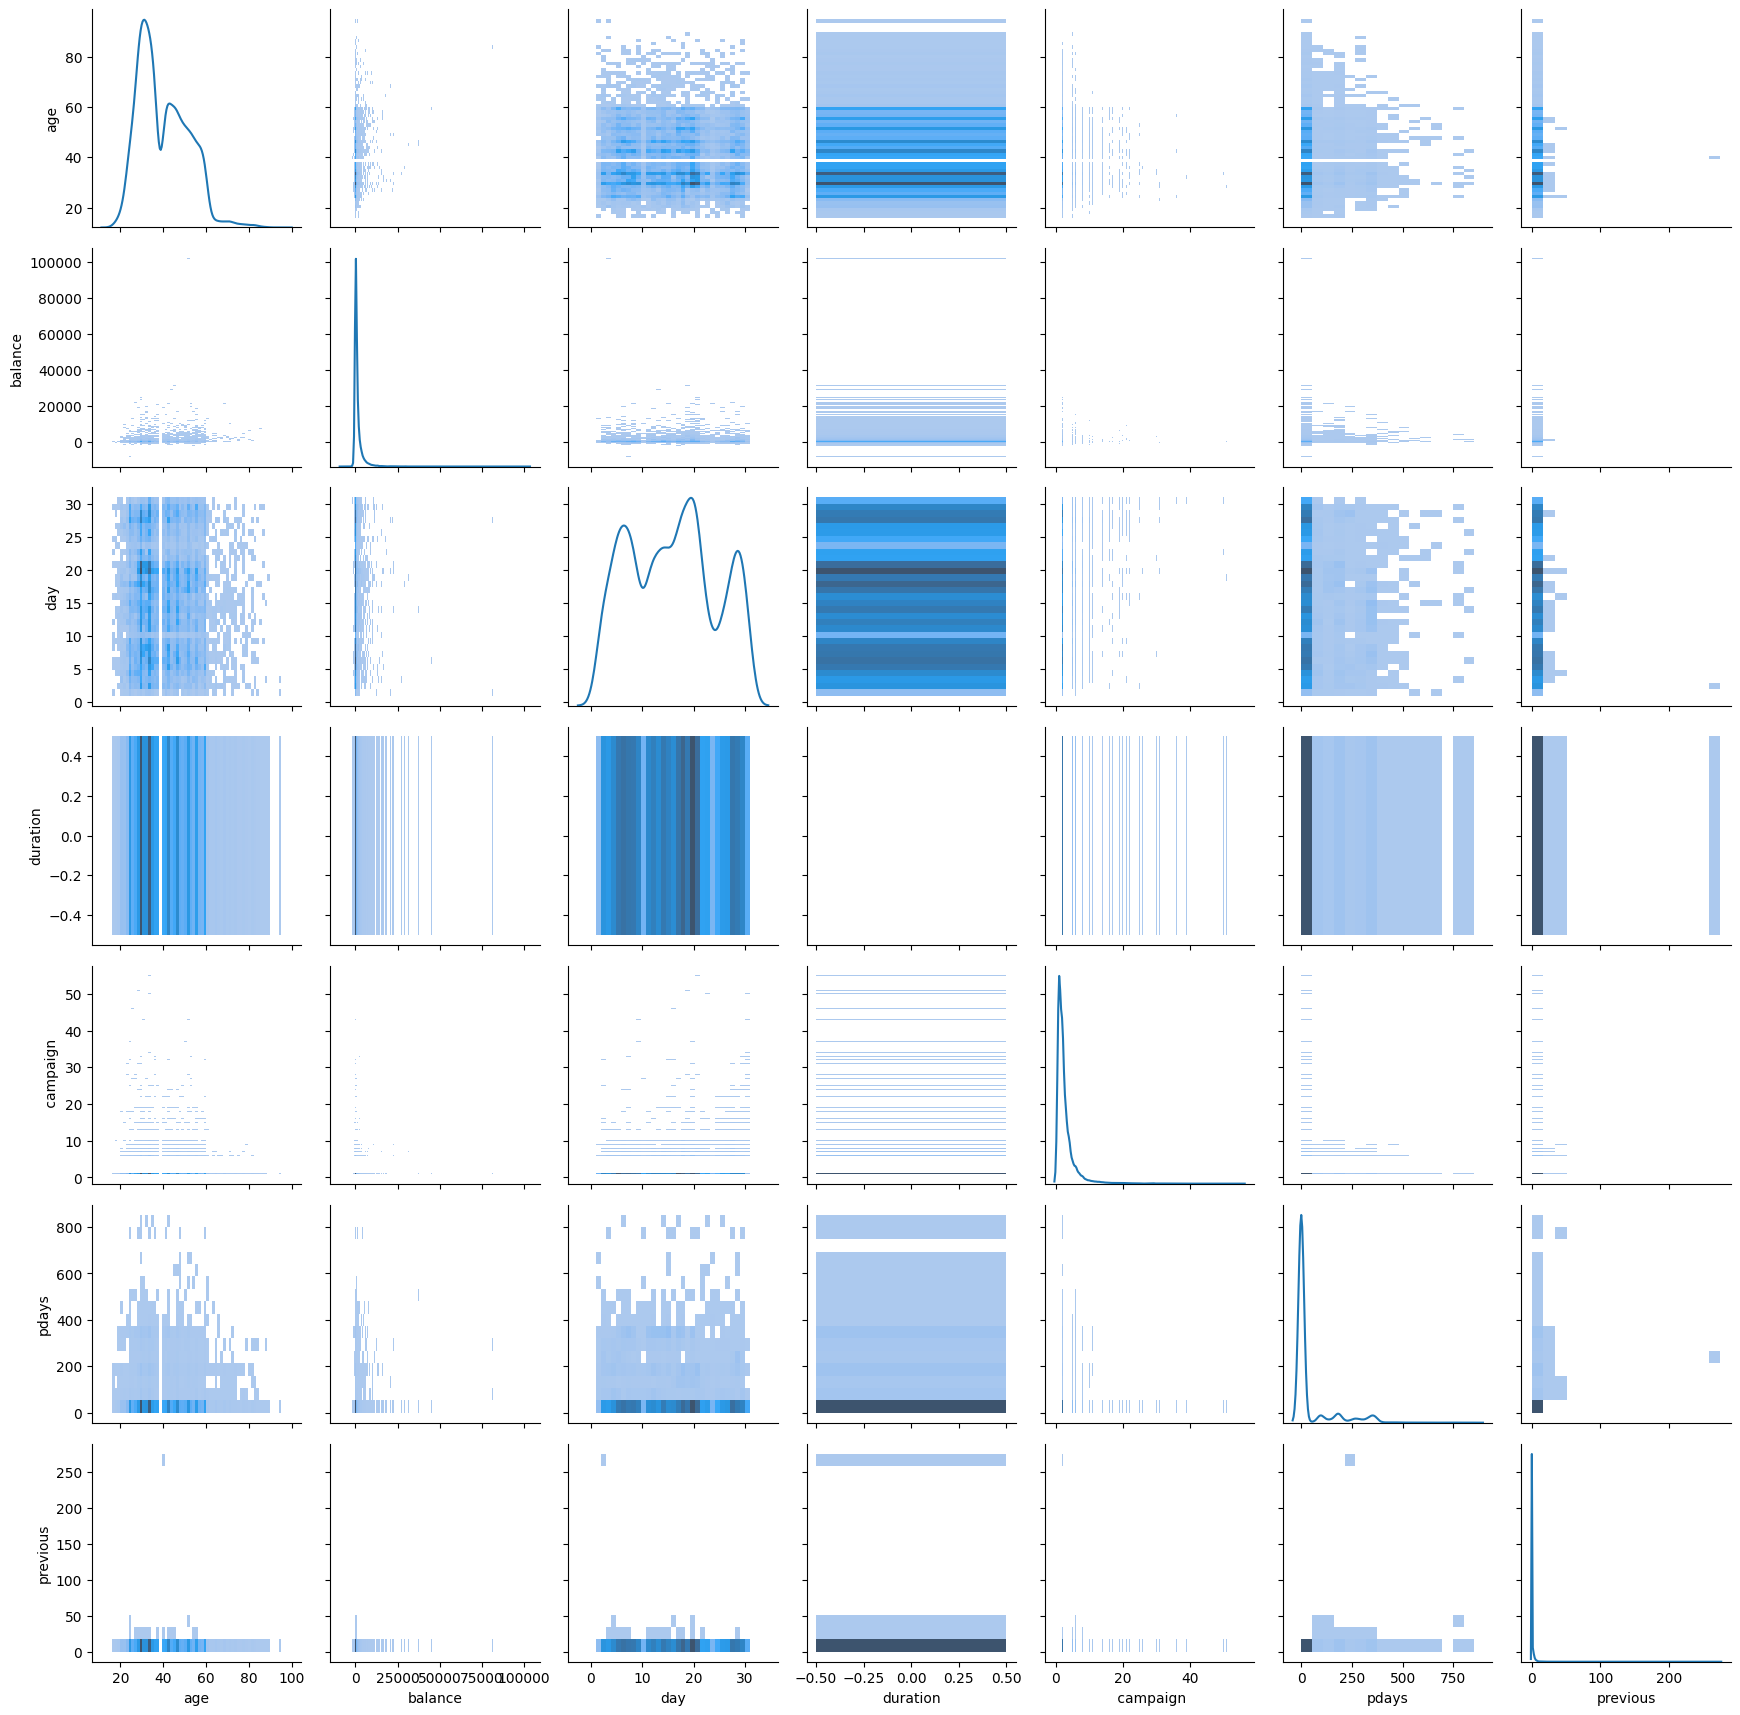

In [10]:
GeneratePairGrid(dfTest)

## Getting descriptive features columns

In [17]:
cat_colums = []
index = [1,2,3,4,6,7,8,10,15]
for idx, col in enumerate(dfTraining.columns.values.tolist()):
    if idx in index:
        cat_colums.append(col)
        
cat_colums

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

## Create method to encode any given data set, depending on its status

In [18]:
def encodeDataFrame(df, isTest):
    enc = OneHotEncoder(handle_unknown='ignore')
    enc.fit(df[cat_colums])
    transformed_data = enc.transform(df[cat_colums]).toarray()
    transformed_df = pd.DataFrame(transformed_data, columns=enc.get_feature_names_out(cat_colums))
    #if is the test set
    #No need to concatenate the 'y' column
    if isTest:
        return transformed_df
    else:
        return pd.concat([transformed_df, df['y']], axis=1)

## Encode training set using OneHotEncoder

In [19]:
dfTraining = encodeDataFrame(dfTraining, False)
dfTraining

,job_JobCat1,job_JobCat10,job_JobCat11,job_JobCat2,job_JobCat3,job_JobCat4,job_JobCat5,job_JobCat6,job_JobCat7,job_JobCat8,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,TypeA
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,TypeA
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,TypeA
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,TypeA
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,TypeA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27267,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,TypeB
27268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,TypeB
27269,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,TypeB
27270,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,TypeA


In [20]:
dfTest = encodeDataFrame(dfTest, True)
dfTest

,job_JobCat1,job_JobCat10,job_JobCat11,job_JobCat2,job_JobCat3,job_JobCat4,job_JobCat5,job_JobCat6,job_JobCat7,job_JobCat8,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17934,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
17935,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
17936,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
17937,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [77]:
# enc = OneHotEncoder(handle_unknown='ignore')
# enc.fit(dfTraining[cat_colums])
# transformed_data = enc.transform(dfTraining[cat_colums]).toarray()
# transformed_df = pd.DataFrame(transformed_data, columns=enc.get_feature_names_out(cat_colums))
# dfTraining = pd.concat([transformed_df, dfTraining['y']], axis=1)

# dfTraining

,job_JobCat1,job_JobCat10,job_JobCat11,job_JobCat2,job_JobCat3,job_JobCat4,job_JobCat5,job_JobCat6,job_JobCat7,job_JobCat8,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,TypeA
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,TypeA
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,TypeA
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,TypeA
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,TypeA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27267,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,TypeB
27268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,TypeB
27269,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,TypeB
27270,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,TypeA


In [78]:
# enc.fit(dfTest[cat_colums])
# transformed_data = enc.transform(dfTest[cat_colums]).toarray()
# dfTest = pd.DataFrame(transformed_data, columns=enc.get_feature_names_out(cat_colums))

# dfTest

,job_JobCat1,job_JobCat10,job_JobCat11,job_JobCat2,job_JobCat3,job_JobCat4,job_JobCat5,job_JobCat6,job_JobCat7,job_JobCat8,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17934,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
17935,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
17936,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
17937,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


## Defning features and targets

### Using all columns except the target column y as features

In [21]:
feature = dfTraining.iloc[:,:-1]
target = dfTraining.iloc[:,-1:]


target = target['y'].map({'TypeA': 1, 'TypeB': 0})
feature




,job_JobCat1,job_JobCat10,job_JobCat11,job_JobCat2,job_JobCat3,job_JobCat4,job_JobCat5,job_JobCat6,job_JobCat7,job_JobCat8,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27267,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
27268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
27269,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
27270,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


### Spliting the training set 

In [22]:
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=14)
print(np.shape(X_train), np.shape(X_test))

X_train


(21817, 44) (5455, 44)


,job_JobCat1,job_JobCat10,job_JobCat11,job_JobCat2,job_JobCat3,job_JobCat4,job_JobCat5,job_JobCat6,job_JobCat7,job_JobCat8,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
18429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
22367,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
11310,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
18405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
18972,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22855,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
18838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9484,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13656,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Scalliing the features on the Training set

In [23]:
MxScaler = MinMaxScaler()

X_train = MxScaler.fit_transform(X_train)
X_test = MxScaler.fit_transform(X_test)

X_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [82]:
# scaler = StandardScaler()
# scaler.fit(X_train)

# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

[0.152153987167736, 0.20183318056828597, 0.13235563703024747, 0.13968835930339138, 0.11255728689275894, 0.11677360219981668, 0.11200733272227315, 0.1145737855178735, 0.11109074243813015, 0.11109074243813015, 0.11127406049495875, 0.10999083409715857, 0.10925756186984419, 0.10944087992667277, 0.10962419798350137, 0.10907424381301559, 0.10925756186984419, 0.10962419798350137, 0.10999083409715857, 0.11017415215398717, 0.11164069660861595, 0.11109074243813015, 0.11237396883593034, 0.11164069660861595, 0.11182401466544455, 0.11219065077910174, 0.11274060494958753, 0.11274060494958753, 0.11237396883593034, 0.11182401466544455, 0.11237396883593034, 0.11145737855178735, 0.11255728689275894, 0.11182401466544455, 0.11145737855178735, 0.11127406049495875, 0.11219065077910174, 0.11219065077910174, 0.11219065077910174]


Text(0, 0.5, 'Error Rate')

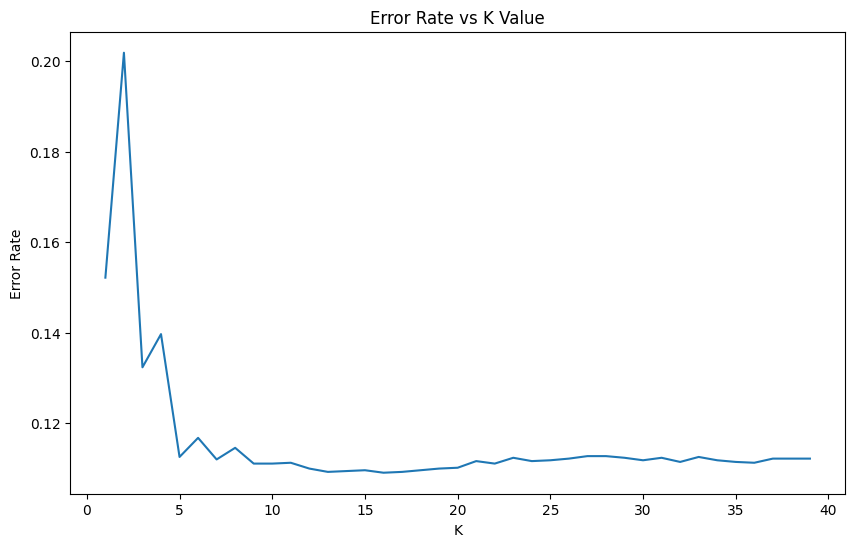

In [83]:
import numpy as np 

error_rate = []
#Get best n_neighbors value
for i in range(1,40):
    knn_test = KNeighborsClassifier(n_neighbors=i)
    knn_test.fit(X_train, y_train)
    pred_i = knn_test.predict(X_test)
    # error_rate.append(np.mean(pred_i.reshape(5455,1) != y_test))
    error_rate.append(np.mean(pred_i != y_test))
    
print(error_rate)
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate)
plt.title("Error Rate vs K Value")
plt.xlabel('K')
plt.ylabel('Error Rate')


### Defining best index object that will hold all test precisions values from the 3 different classifier to determine which model to use

In [24]:
best_index_dict = {}

In [28]:
def GetModelScore(NCounts, classifierName):
    List = np.arange(1, NCounts, 1)
    score_train = np.zeros(len(List))
    score_test = np.zeros(len(List))
    recall_test = np.zeros(len(List))
    precision_test = np.zeros(len(List))
    count = 0
    for n in List:
        
        match classifierName:
            case 'KNN':
                model = KNeighborsClassifier(n_neighbors=n)
                param = 'n_neighbors'

            case 'Naive Bayes':
                model = naive_bayes.MultinomialNB(alpha=n)
                param = 'alpha'

            case 'Decision Tree':
                model = DecisionTreeClassifier(max_depth=n, random_state=42)
                param = 'max_depth'
                                
        model.fit(X_train, y_train)
        score_train[count] = model.score(X_train, y_train)
        score_test[count]= model.score(X_test, y_test)
        recall_test[count] = metrics.recall_score(y_test, model.predict(X_test), pos_label=1)
        precision_test[count] = metrics.precision_score(y_test, model.predict(X_test), pos_label=1)
        count = count + 1 
    matrix = np.matrix(np.c_[List, score_train, score_test, recall_test, precision_test])
    models = pd.DataFrame(data = matrix, columns = 
                [param, 'Train Accuracy', 'Test Accuracy', 'Test Recall', 'Test Precision'])

    best_index = models['Test Precision'].idxmax()
    OptimunN = models.iloc[best_index, :]

    OptimunN['Test Precision']


    best_index_dict[classifierName] = OptimunN['Test Precision']
    
    return OptimunN

In [29]:
Knn_Max_Score = GetModelScore(40, 'KNN')
Naive_Bayes_Max_Score = GetModelScore(40, 'Naive Bayes')
Decistion_Tree_Max_Score = GetModelScore(40, 'Decision Tree')

In [30]:
best_index_dict

{'KNN': 0.9158438061041293,
 'Naive Bayes': 0.9111372088471326,
 'Decision Tree': 0.911776367961935}

In [31]:
best_model = max(best_index_dict, key=best_index_dict.get)

best_model

'KNN'

In [41]:
Decistion_Tree_Max_Score


max_depth         23.000000
Train Accuracy     0.922629
Test Accuracy      0.880293
Test Recall        0.956730
Test Precision     0.911776
Name: 22, dtype: float64

In [35]:
math.floor(Knn_Max_Score['n_neighbors'])

2

In [55]:
def WriteResultsToFile(pred):
    with open('D21125648.txt', 'w') as f:
        for idx, p in enumerate(pred):
            type = 'TypeA' if p == 1 else 'TypeB'
            f.write(f"{idx},{type}\n")
    f.close()

In [64]:
def GenerateResultWithBestParams(modelName):
    try:        
        match modelName:
            case 'KNN':
                model = KNeighborsClassifier(n_neighbors=math.floor(Knn_Max_Score['n_neighbors']))
                paramName = 'n_neighbors'
                paramValue = Knn_Max_Score
            case 'Naive Bayes':
                model = naive_bayes.MultinomialNB(alpha=math.floor(Naive_Bayes_Max_Score['alpha']))
                paramName = 'alpha'
                paramValue = Naive_Bayes_Max_Score

            case 'Decision Tree':
                model = DecisionTreeClassifier(max_depth=math.floor(Decistion_Tree_Max_Score['max_depth']), random_state=42)
                paramName = 'max_depth'
                paramValue = Decistion_Tree_Max_Score
        model.fit(X_train, y_train)
        pred = model.predict(dfTest)
        WriteResultsToFile(pred)
        print(f"File generate successfully.\n Model: {modelName}\n with {paramName} = {math.floor(paramValue[paramName])}")
    except:
        print("Error generating result file. Try again.")


In [65]:
best_model

'KNN'

In [66]:
GenerateResultWithBestParams(best_model)

c:\Users\d4nie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


File generate successfully.
 Model: KNN
 with n_neighbors = 2


In [85]:
KNN_List = np.arange(1, 10, 1)
score_train = np.zeros(len(KNN_List))
score_test = np.zeros(len(KNN_List))
recall_test = np.zeros(len(KNN_List))
precision_test = np.zeros(len(KNN_List))
count = 0
for n in KNN_List:
    knn_model = KNeighborsClassifier(n_neighbors=n)
    knn_model.fit(X_train, y_train)
    score_train[count] = knn_model.score(X_train, y_train)
    score_test[count]= knn_model.score(X_test, y_test)
    recall_test[count] = metrics.recall_score(y_test, knn_model.predict(X_test), pos_label=1)
    precision_test[count] = metrics.precision_score(y_test, knn_model.predict(X_test), pos_label=1)
    count = count + 1 



In [86]:
matrix = np.matrix(np.c_[KNN_List, score_train, score_test, recall_test, precision_test])
models = pd.DataFrame(data = matrix, columns = 
             ['n_neighbors', 'Train Accuracy', 'Test Accuracy', 'Test Recall', 'Test Precision'])
models.head(40)

,n_neighbors,Train Accuracy,Test Accuracy,Test Recall,Test Precision
0,1.0,0.896503,0.847846,0.927606,0.902449
1,2.0,0.847779,0.798167,0.848970,0.915844
2,3.0,0.889444,0.867644,0.954025,0.901514
3,4.0,0.883990,0.860312,0.934055,0.909828
4,5.0,0.898657,0.887443,0.981901,0.899562
5,6.0,0.894165,0.883226,0.967547,0.906274
6,7.0,0.895769,0.887993,0.984606,0.898102
7,8.0,0.897603,0.885426,0.975244,0.902580
8,9.0,0.896411,0.888909,0.986062,0.897897


In [87]:
best_index_knn = models['Test Precision'].idxmax()
OptimunN = models.iloc[best_index_knn, :]

OptimunN['Test Precision']

#OptimunN["n_neighbors"]

best_index_dict['knn_precision'] = OptimunN['Test Precision']


In [88]:
import math
classifier = KNeighborsClassifier(n_neighbors=math.floor(OptimunN["n_neighbors"]))

classifier.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=2)

In [89]:
pred = classifier.predict(X_test)
with open('outputKNN.txt', 'a') as f:
    for idx, p in enumerate(pred):
        type = 'TypeA' if p == 1 else 'TypeB'
        f.write(f"{idx},{type}\n")
        print(f"{idx},{type}")
    f.close()


0,TypeA
1,TypeA
2,TypeA
3,TypeA
4,TypeA
5,TypeA
6,TypeA
7,TypeB
8,TypeB
9,TypeA
10,TypeA
11,TypeA
12,TypeA
13,TypeA
14,TypeA
15,TypeA
16,TypeB
17,TypeA
18,TypeA
19,TypeA
20,TypeB
21,TypeA
22,TypeB
23,TypeB
24,TypeB
25,TypeA
26,TypeA
27,TypeA
28,TypeA
29,TypeB
30,TypeA
31,TypeA
32,TypeA
33,TypeA
34,TypeA
35,TypeA
36,TypeA
37,TypeA
38,TypeA
39,TypeA
40,TypeA
41,TypeA
42,TypeA
43,TypeA
44,TypeA
45,TypeA
46,TypeA
47,TypeB
48,TypeA
49,TypeA
50,TypeA
51,TypeA
52,TypeA
53,TypeA
54,TypeA
55,TypeA
56,TypeA
57,TypeA
58,TypeA
59,TypeA
60,TypeA
61,TypeA
62,TypeA
63,TypeA
64,TypeA
65,TypeA
66,TypeA
67,TypeA
68,TypeA
69,TypeA
70,TypeB
71,TypeA
72,TypeA
73,TypeA
74,TypeA
75,TypeA
76,TypeA
77,TypeA
78,TypeA
79,TypeB
80,TypeA
81,TypeA
82,TypeA
83,TypeA
84,TypeB
85,TypeA
86,TypeB
87,TypeA
88,TypeA
89,TypeA
90,TypeA
91,TypeA
92,TypeA
93,TypeA
94,TypeA
95,TypeA
96,TypeA
97,TypeA
98,TypeB
99,TypeA
100,TypeB
101,TypeA
102,TypeA
103,TypeA
104,TypeA
105,TypeA
106,TypeA
107,TypeA
108,TypeA
109,TypeA
110,TypeA


In [90]:
len(pred)

5455

In [91]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
print(accuracy_score(y_test, pred))


[[ 273  375]
 [ 726 4081]]
              precision    recall  f1-score   support

           0       0.27      0.42      0.33       648
           1       0.92      0.85      0.88      4807

    accuracy                           0.80      5455
   macro avg       0.59      0.64      0.61      5455
weighted avg       0.84      0.80      0.82      5455

0.798166819431714


## MultinomialNB


## TypeA and TypeB distribution

C:\Users\d4nie\AppData\Local\Temp\ipykernel_21640\3186451447.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count = pd.value_counts(dfTraining["y"], sort=True)


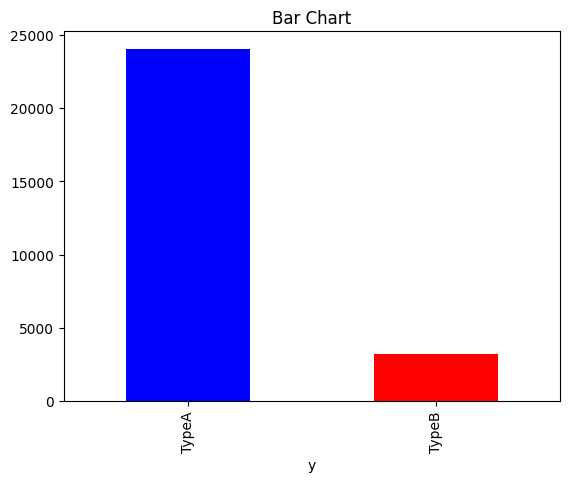

In [92]:
count = pd.value_counts(dfTraining["y"], sort=True)
count.plot(kind='bar', color=['blue', 'red'])
plt.title('Bar Chart')
plt.show()

In [93]:
# dfTraining = pd.read_csv('trainingset.txt')

# enc = OneHotEncoder(handle_unknown='ignore')
# enc.fit(dfTraining[cat_colums])
# transformed_data = enc.transform(dfTraining[cat_colums]).toarray()
# transformed_df = pd.DataFrame(transformed_data, columns=enc.get_feature_names_out(cat_colums))
# dfTraining = pd.concat([transformed_df, dfTraining['y']], axis=1)


# dfTraining

# X_train, X_test, y_train, y_test = train_test_split(dfTraining.iloc[:,:-1], dfTraining.iloc[:,-1], test_size=0.2, random_state=14)
# print(np.shape(X_train), np.shape(X_test))
# y_test


In [94]:
alpha_list = np.arange(1, 20, 1)
score_train = np.zeros(len(alpha_list))
score_test = np.zeros(len(alpha_list))
recall_test = np.zeros(len(alpha_list))
precision_test = np.zeros(len(alpha_list))
count = 0
for alpha in alpha_list:
    model = naive_bayes.MultinomialNB(alpha=alpha)
    model.fit(X_train, y_train)
    score_train[count] = model.score(X_train, y_train)
    score_test[count]= model.score(X_test, y_test)
    recall_test[count] = metrics.recall_score(y_test, model.predict(X_test), pos_label=1)
    precision_test[count] = metrics.precision_score(y_test, model.predict(X_test), pos_label=1)
    count = count + 1 


In [95]:
matrix = np.matrix(np.c_[alpha_list, score_train, score_test, recall_test, precision_test])
models = pd.DataFrame(data = matrix, columns = 
             ['alpha', 'Train Accuracy', 'Test Accuracy', 'Test Recall', 'Test Precision'])
models.head(n=30)



,alpha,Train Accuracy,Test Accuracy,Test Recall,Test Precision
0,1.0,0.886144,0.888909,0.968379,0.911137
1,2.0,0.886144,0.888909,0.968379,0.911137
2,3.0,0.886190,0.888909,0.968379,0.911137
3,4.0,0.886327,0.888726,0.968171,0.911120
4,5.0,0.886190,0.888726,0.968171,0.911120
5,6.0,0.886190,0.888726,0.968379,0.910959
6,7.0,0.886190,0.889093,0.968796,0.910994
7,8.0,0.886236,0.889093,0.968796,0.910994
8,9.0,0.886236,0.889093,0.968796,0.910994
9,10.0,0.886281,0.889093,0.968796,0.910994


In [96]:
best_index = models['Test Precision'].idxmax()
optimun_NB = models.iloc[best_index, :]

In [97]:
best_index_dict['naive_bayes_precision'] = optimun_NB['Test Precision']


In [98]:
# enc.fit(dfTest[cat_colums])
# transformed_data = enc.transform(dfTest[cat_colums]).toarray()
# dfTest = pd.DataFrame(transformed_data, columns=enc.get_feature_names_out(cat_colums))

# dfTest

KeyError: "None of [Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',\n       'month', 'poutcome'],\n      dtype='object')] are in the [columns]"

In [99]:
bayes_model = naive_bayes.MultinomialNB(alpha=1)
bayes_model.fit(X_train, y_train)



bayes_pred = bayes_model.predict(dfTest)



c:\Users\d4nie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(


In [100]:
len(bayes_pred)

17939

In [101]:
print(bayes_pred)
typeACount = 0
typeBCount = 0
for idx, p in enumerate(bayes_pred):
    if p == 0:
        typeBCount += 1
    else:
        typeACount += 1
        
print(typeACount)
print(typeBCount)

[1 1 1 ... 0 1 1]
16816
1123


In [102]:
with open('output_naiveBayes.txt', 'w') as f:
    for idx, p in enumerate(bayes_pred):
        type = 'TypeA' if p == 1 else 'TypeB'
        f.write(f"{idx},{type}\n")
        print(f"{idx},{type}")
    f.close()

0,TypeA
1,TypeA
2,TypeA
3,TypeA
4,TypeA
5,TypeA
6,TypeA
7,TypeA
8,TypeA
9,TypeA
10,TypeA
11,TypeA
12,TypeA
13,TypeA
14,TypeA
15,TypeA
16,TypeA
17,TypeA
18,TypeA
19,TypeA
20,TypeA
21,TypeA
22,TypeA
23,TypeA
24,TypeA
25,TypeA
26,TypeA
27,TypeA
28,TypeA
29,TypeA
30,TypeA
31,TypeA
32,TypeA
33,TypeA
34,TypeA
35,TypeA
36,TypeA
37,TypeA
38,TypeA
39,TypeA
40,TypeA
41,TypeA
42,TypeA
43,TypeA
44,TypeA
45,TypeA
46,TypeA
47,TypeA
48,TypeA
49,TypeA
50,TypeA
51,TypeA
52,TypeA
53,TypeA
54,TypeA
55,TypeA
56,TypeA
57,TypeA
58,TypeA
59,TypeA
60,TypeA
61,TypeA
62,TypeA
63,TypeA
64,TypeA
65,TypeA
66,TypeA
67,TypeA
68,TypeA
69,TypeA
70,TypeA
71,TypeA
72,TypeA
73,TypeA
74,TypeA
75,TypeA
76,TypeA
77,TypeA
78,TypeA
79,TypeA
80,TypeA
81,TypeA
82,TypeA
83,TypeA
84,TypeA
85,TypeA
86,TypeA
87,TypeA
88,TypeA
89,TypeA
90,TypeA
91,TypeA
92,TypeA
93,TypeA
94,TypeA
95,TypeA
96,TypeA
97,TypeA
98,TypeA
99,TypeA
100,TypeA
101,TypeA
102,TypeA
103,TypeA
104,TypeA
105,TypeA
106,TypeA
107,TypeA
108,TypeA
109,TypeA
110,TypeA


## Decision Tree Classifier

In [103]:
from sklearn.tree import DecisionTreeClassifier


tree_model = DecisionTreeClassifier(max_depth=23, random_state=42)

tree_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=23, random_state=42)

In [104]:
tree_pred = tree_model.predict(dfTest)

c:\Users\d4nie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [105]:
tree_pred
countA = 0
countB = 0
for idx, r in enumerate(tree_pred):
    type = 'TypeA' if r == 1 else 'TypeB'
    if r == 1:
        countA +=1 
    else:
        countB +=1
        
    print(f"{idx},{type}")
    
print(countA)
print(countB)



0,TypeA
1,TypeA
2,TypeA
3,TypeA
4,TypeA
5,TypeA
6,TypeA
7,TypeA
8,TypeA
9,TypeA
10,TypeA
11,TypeA
12,TypeA
13,TypeA
14,TypeA
15,TypeA
16,TypeA
17,TypeA
18,TypeA
19,TypeA
20,TypeA
21,TypeA
22,TypeA
23,TypeA
24,TypeA
25,TypeA
26,TypeA
27,TypeA
28,TypeA
29,TypeA
30,TypeA
31,TypeA
32,TypeA
33,TypeA
34,TypeA
35,TypeA
36,TypeA
37,TypeA
38,TypeA
39,TypeA
40,TypeA
41,TypeA
42,TypeA
43,TypeA
44,TypeA
45,TypeA
46,TypeA
47,TypeA
48,TypeA
49,TypeA
50,TypeA
51,TypeA
52,TypeA
53,TypeA
54,TypeA
55,TypeA
56,TypeA
57,TypeA
58,TypeA
59,TypeA
60,TypeA
61,TypeA
62,TypeA
63,TypeA
64,TypeA
65,TypeA
66,TypeA
67,TypeA
68,TypeA
69,TypeA
70,TypeA
71,TypeB
72,TypeA
73,TypeA
74,TypeA
75,TypeA
76,TypeA
77,TypeA
78,TypeA
79,TypeA
80,TypeA
81,TypeA
82,TypeA
83,TypeA
84,TypeA
85,TypeA
86,TypeA
87,TypeA
88,TypeA
89,TypeA
90,TypeA
91,TypeA
92,TypeA
93,TypeA
94,TypeA
95,TypeA
96,TypeA
97,TypeA
98,TypeA
99,TypeA
100,TypeA
101,TypeA
102,TypeA
103,TypeA
104,TypeA
105,TypeA
106,TypeA
107,TypeA
108,TypeA
109,TypeA
110,TypeA


In [106]:
len(tree_pred)

17939

In [ ]:

with open('output_tree.txt', 'w') as f:
    for idx, p in enumerate(tree_pred):
        type = 'TypeA' if p == 1 else 'TypeB'
        f.write(f"{idx},{type}\n")
        print(f"{idx},{type}")
    f.close()

In [107]:
max_depth_list = np.arange(1, 30, 1)
score_train = np.zeros(len(max_depth_list))
score_test = np.zeros(len(max_depth_list))
recall_test = np.zeros(len(max_depth_list))
precision_test = np.zeros(len(max_depth_list))
count = 0
for max_depth in max_depth_list:
    tree_model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    tree_model.fit(X_train, y_train)
    score_train[count] = tree_model.score(X_train, y_train)
    score_test[count]= tree_model.score(X_test, y_test)
    recall_test[count] = metrics.recall_score(y_test, tree_model.predict(X_test), pos_label=1)
    precision_test[count] = metrics.precision_score(y_test, tree_model.predict(X_test), pos_label=1)
    count = count + 1 


In [108]:
matrix = np.matrix(np.c_[max_depth_list, score_train, score_test, recall_test, precision_test])
models = pd.DataFrame(data = matrix, columns = 
             ['max_depth', 'Train Accuracy', 'Test Accuracy', 'Test Recall', 'Test Precision'])
models.head(40)

,max_depth,Train Accuracy,Test Accuracy,Test Recall,Test Precision
0,1.0,0.891415,0.895692,0.990639,0.900870
1,2.0,0.891644,0.895142,0.985646,0.904026
2,3.0,0.892240,0.895142,0.986062,0.903718
3,4.0,0.893294,0.892392,0.988974,0.899017
4,5.0,0.894028,0.891842,0.985646,0.900932
5,6.0,0.895403,0.895325,0.986686,0.903429
6,7.0,0.896778,0.894042,0.985646,0.902992
7,8.0,0.898336,0.892576,0.983982,0.902844
8,9.0,0.899574,0.892942,0.985022,0.902420
9,10.0,0.901361,0.892026,0.982109,0.903714


In [109]:
best_index_tree = models['Test Precision'].idxmax()
Optimun_Tree = models.iloc[best_index_tree, :]

In [110]:
best_index_dict['tree_precision'] = Optimun_Tree['Test Precision']


In [117]:
best_index_dict
best_model = max(best_index_dict, key=best_index_dict.get)

best_model

'knn_precision'